

# PCA
   - Helps to identify relationships and corelations among attributes
   - Steps
     - Get correlation or covariance matrix -> calculate eigen values and   eigne vectors of the correlation or covariance matrix -> PC = eigen values or eigen vector * Original data
   - Linear transformation




In [1]:
# Import numpy
import numpy as np
# Import linear algebra module
from scipy import linalg as la

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
sns.set(style='darkgrid')

In [2]:
# Create dataset
data=np.array([[7., 4., 3.],
[4., 1., 8.],
[6., 3., 5.],
[8., 6., 1.],
[8., 5., 7.],
[7., 2., 9.],
[5., 3., 3.],
[9., 5., 8.],
[7., 4., 5.],
[8., 2., 2.]])

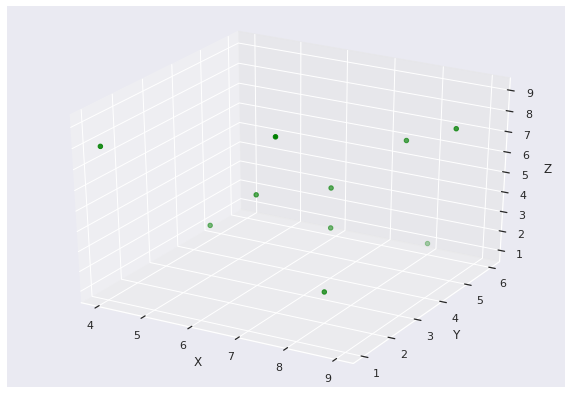

In [3]:
df = pd.DataFrame(data, columns=["X", "Y", "Z"])
fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot(111, projection = '3d')

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

ax.scatter(df['X'], df['Y'], df['Z'], color='green')
plt.show()

Get correlation or covariance matrix

In [4]:
# Calculate the covariance matrix
# Center your data
data -= data.mean(axis=0)
cov = np.cov(data, rowvar=False)

Calculate eigen values and eigne vectors of the correlation or covariance matrix

In [5]:
# Calculate eigenvalues and eigenvector of the covariance matrix
evals, evecs = la.eig(cov)

In [6]:
# Multiply the original data matrix with Eigenvector matrix.
# Sort the Eigen values and vector and select components
num_components=2
sorted_key = np.argsort(evals)[::-1][:num_components]
evals, evecs = evals[sorted_key], evecs[:, sorted_key]

print("Eigenvalues:", evals)
print("Eigenvector:", evecs)

Eigenvalues: [8.27394258+0.j 3.67612927+0.j]
Eigenvector: [[-0.1375708   0.69903712]
 [-0.25045969  0.66088917]
 [ 0.95830278  0.27307986]]
Sorted and Selected Eigen Values: [8.27394258+0.j 3.67612927+0.j]
Sorted and Selected Eigen Vector: [[-0.1375708   0.69903712]
 [-0.25045969  0.66088917]
 [ 0.95830278  0.27307986]]


Principal components = eigen values or eigen vector * Original data

In [7]:
# Multiply original data and Eigen vector
principal_components=np.dot(data,evecs)
print("Principal Components:", principal_components)

Principal Components: [[-2.15142276 -0.17311941]
 [ 3.80418259 -2.88749898]
 [ 0.15321328 -0.98688598]
 [-4.7065185   1.30153634]
 [ 1.29375788  2.27912632]
 [ 4.0993133   0.1435814 ]
 [-1.62582148 -2.23208282]
 [ 2.11448986  3.2512433 ]
 [-0.2348172   0.37304031]
 [-2.74637697 -1.06894049]]


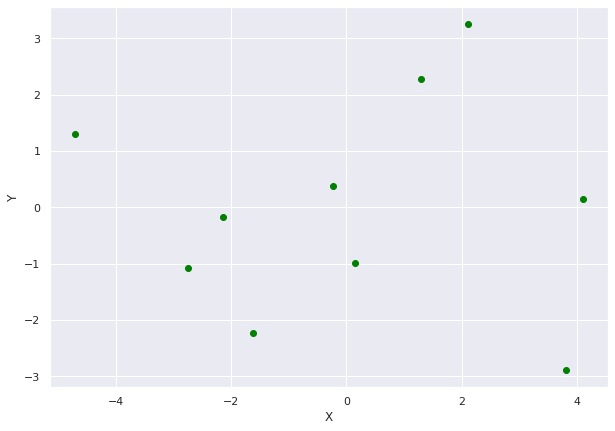

In [8]:
df_principal_components = pd.DataFrame(principal_components, columns=["X", "Y"])
fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot(111)

ax.set_xlabel("X")
ax.set_ylabel("Y")

ax.scatter(df_principal_components['X'], df_principal_components['Y'], color='green')
plt.show()

## PCA with sklearn

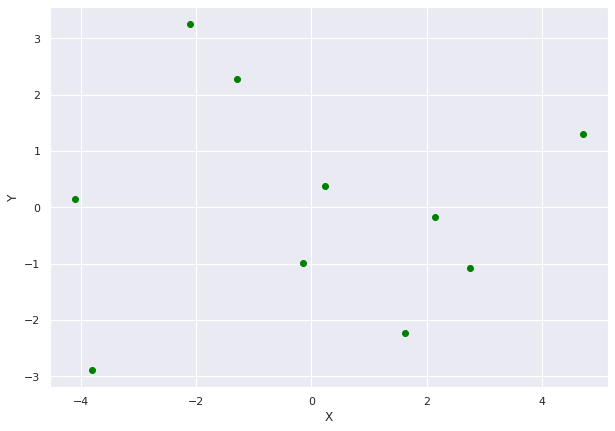

Principal Components: [[ 2.15142276 -0.17311941]
 [-3.80418259 -2.88749898]
 [-0.15321328 -0.98688598]
 [ 4.7065185   1.30153634]
 [-1.29375788  2.27912632]
 [-4.0993133   0.1435814 ]
 [ 1.62582148 -2.23208282]
 [-2.11448986  3.2512433 ]
 [ 0.2348172   0.37304031]
 [ 2.74637697 -1.06894049]]


In [11]:
from sklearn.decomposition import PCA


model = PCA(n_components=2)

principal_components = model.fit_transform(data)

df_principal_components = pd.DataFrame(principal_components, columns=["X", "Y"])
fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot(111)

ax.set_xlabel("X")
ax.set_ylabel("Y")

ax.scatter(df_principal_components['X'], df_principal_components['Y'], color='green')
plt.show()
print("Principal Components:", principal_components)